# uspex SXD data test

In [1]:
# set default parameters

raw_path = '/Users/michaelcushing/Science/Software/Python/uSpeXdata/ShortXD/raw/'
cal_path = '/Users/michaelcushing/Science/Software/Python/Demo/'
proc_path = '/Users/michaelcushing/Science/Software/Python/Demo/'
qa_path = '/Users/michaelcushing/Science/Software/Python/Demo/'

instrument = 'uspex'
prefix = 'spc-'
src_files = '1-2'
arc_file = '22'
flat_files = '18-21'
orders = '3-9'
source_type = 'ps'
ps_aperture = 1.5
ps_bg_parameters = [2.5,4]





## Load the Package and Set Paths

In [3]:
# Load the package and paths

import pyspextool as ps

ps.set_paths(raw_path = raw_path, cal_path=cal_path, proc_path=proc_path, qa_path=qa_path)


Pyspextool Setup
----------------
Instrument:  uspex

Rawpath:  /Users/michaelcushing/Science/Software/Python/uSpeXdata/ShortXD/raw
Calpath:  /Users/michaelcushing/Science/Software/Python/Demo
Procpath:  /Users/michaelcushing/Science/Software/Python/Demo
Qapath:  /Users/michaelcushing/Science/Software/Python/Demo

QA Extension: .pdf
----------------



## Create the Flat and Wavecal Files

 
Creating the flat field...
Loading FITS images...
Scaling images...
Medianing the images...
Locating the orders...
Normalizing the median image...
Writing flat to disk...
float64
float64
int64
Flat field flat18-21.fits written to disk.
 
Creating the wavecal file...
Loading FITS images...
Extracting 1 apertures in 7 orders (without background subtraction)...
100% |**********************************************************************|
Finding the lines...
100% |**********************************************************************|
Determining the wavelength solution...
Writing wavecal to disk...


Wavecal wavecal22.fits written to disk.


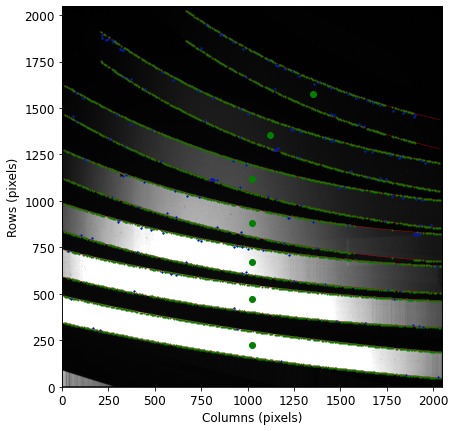

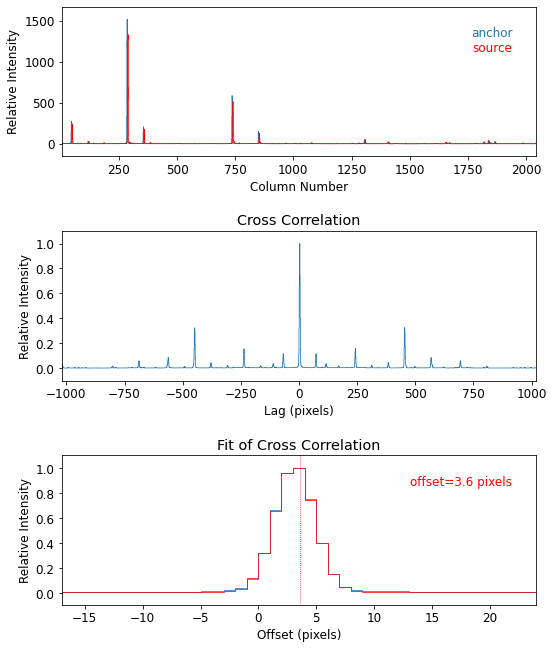

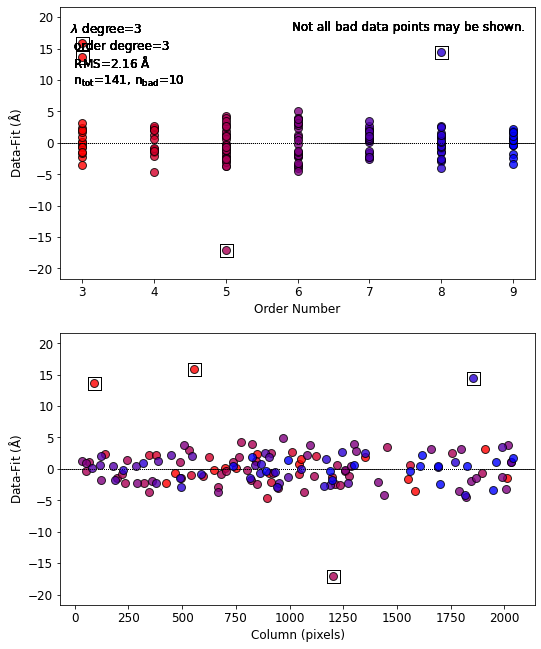

In [8]:
# Create the flat and wavecal file

# generate flat field
ps.extract.make_flat(flat_files,'flat{}'.format(flat_files),qafile=True)

# wavelength calibration
ps.extract.make_wavecal(arc_file,'flat{}.fits'.format(flat_files),'wavecal{}'.format(arc_file),qafile_findlines=True, use_stored_solution=False)


## A Point Source Extraction

In [7]:
ps.extract.load_image([src_files, prefix], 'flat18-21.fits', 'wavecal22.fits',
                      flat_field=True, linearity_correction=False, iplot=False,
                      qafile=False, reduction_mode='A-B')

ps.extract.set_extraction_type('ps')

ps.extract.make_spatial_profiles(iplot=False, qafile=False)

ps.extract.locate_aperture_positions([3.7,11.2], method='guess', iplot=False,
                                    qafile=False)

ps.extract.select_orders(include='3-9', iplot=False, qafile=False)

ps.extract.trace_apertures(iplot=False, qafile=False)

ps.extract.define_aperture_parameters(1.5, iplot=False, psf_radius=1.5,
                                      bg_radius=1.6, bg_width=2, qafile=False)

ps.extract.extract_apertures()

Loading the flat...
Loading the wavecal...
Loading the image and not correcting for non-linearity...
Flat fielding the image...
Setting extraction type to point source...
Creating the spatial profiles...
Locating the apertures...
Aperture signs are (+, -)...
Updating order selection...
Tracing apertures...


/Users/michaelcushing/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


100% |**********************************************************************|
Extracting 2 apertures in 7 orders (with background subtraction)...
100% |**********************************************************************|
Wrote spectra00001.fits to disk.
Wrote spectra00002.fits to disk.
